In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

2021-12-06 12:20:39.056549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-06 12:20:39.056603: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [38]:
from sklearn.model_selection import train_test_split

## Read Input Data

In [81]:
X = np.random.rand(160000).reshape((10000, 16))
avg = lambda t: np.average(t)
y = list((map(avg, X)))
y = np.array(y)

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6700, 16) (3300, 16) (6700,) (3300,)


## Build Model

In [83]:
model = keras.models.Sequential([
    keras.Input(shape = (16, )),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dense(1)
])

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss = tf.losses.MeanSquaredError(), optimizer = tf.optimizers.Adam(),metrics=['mae','mse'])

In [86]:
history = model.fit(X_train, y_train, epochs=25, batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/25
108/108 [==============================] - 0s 2ms/step - loss: 0.0507 - mae: 0.1672 - mse: 0.0507 - val_loss: 0.0110 - val_mae: 0.0843 - val_mse: 0.0110
Epoch 2/25
108/108 [==============================] - 0s 942us/step - loss: 0.0071 - mae: 0.0668 - mse: 0.0071 - val_loss: 0.0040 - val_mae: 0.0504 - val_mse: 0.0040
Epoch 3/25
108/108 [==============================] - 0s 943us/step - loss: 0.0027 - mae: 0.0414 - mse: 0.0027 - val_loss: 0.0017 - val_mae: 0.0330 - val_mse: 0.0017
Epoch 4/25
108/108 [==============================] - 0s 945us/step - loss: 0.0013 - mae: 0.0290 - mse: 0.0013 - val_loss: 9.8090e-04 - val_mae: 0.0244 - val_mse: 9.8090e-04
Epoch 5/25
108/108 [==============================] - 0s 948us/step - loss: 8.3497e-04 - mae: 0.0227 - mse: 8.3497e-04 - val_loss: 6.8978e-04 - val_mae: 0.0205 - val_mse: 6.8978e-04
Epoch 6/25
108/108 [==============================] - 0s 971us/step - loss: 5.9657e-04 - mae: 0.0191 - mse: 5.9657e-04 - val_loss: 5.1736e-04 - val_

In [88]:
# history.history

In [89]:
testing_model = model.evaluate(X_test,y_test,verbose=2)

104/104 - 0s - loss: 1.4854e-05 - mae: 0.0023 - mse: 1.4854e-05 - 66ms/epoch - 635us/step


In [90]:
testing_acc = testing_model[1]*100
# Printing the accuracy
print('Test Accuracy - ', testing_acc,'%')

Test Accuracy -  0.23157945834100246 %


In [91]:
testing_model

[1.4853831089567393e-05, 0.0023157945834100246, 1.4853831089567393e-05]

In [92]:
model.metrics_names

['loss', 'mae', 'mse']

In [93]:
predictions = model.predict(X_test[:3])

In [94]:
print(y_test[:3],"\n",predictions)

[0.53344095 0.44406114 0.58739138] 
 [[0.5316032]
 [0.4427695]
 [0.5880724]]


In [95]:
predictions

array([[0.5316032],
       [0.4427695],
       [0.5880724]], dtype=float32)

In [106]:
import matplotlib.pyplot as plt
plot_x = history.history['loss']
plot_y = list(np.arange(len(x)))

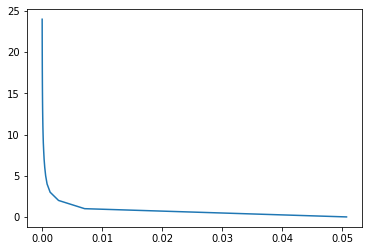

In [107]:
plt.plot(x,y)